# EDA – Dataset de  Producciones de Teatro Musical en España (1999-2025)

Este cuaderno recoge el análisis exploratorio de un dataset construido a partir de fuentes públicas. El objetivo es describir la actividad del sector (obras, productoras, giras, periodos de exhibición y localizaciones principales) y dejar el conjunto de datos listo para fases posteriores de visualización y modelado.
## Sobre la construcción del dataset

El dataset no procede de una base oficial, sino que ha sido construido de forma manual a partir de páginas oficiales de los musicales, notas de prensa, hemerotecas y plataformas de venta de entradas. 

El criterio profesional y el conocimiento del sector han sido claves para contrastar fechas, productoras y espacios, resolviendo inconsistencias entre distintas fuentes cuando ha sido necesario.

No pretende ser un registro exhaustivo de todas las producciones, pero sí una base suficientemente estable y estructurada como para analizar patrones de programación, actividad por productora y evolución temporal del teatro musical en España.


In [3]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos




In [4]:
df = pd.read_csv("musicales_limpio.csv")


In [5]:
df.shape


(60, 9)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   obra              60 non-null     object 
 1   productora        60 non-null     object 
 2   anio_inicio       60 non-null     int64  
 3   anio_fin          47 non-null     float64
 4   teatro            60 non-null     object 
 5   ciudad_principal  60 non-null     object 
 6   gira              60 non-null     object 
 7   fuente_url        60 non-null     object 
 8   activa            60 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 3.9+ KB


In [12]:
df.isna().sum()
df.nunique()

obra                53
productora          11
anio_inicio         23
anio_fin            19
teatro              29
ciudad_principal     5
gira                 2
fuente_url          54
activa               2
dtype: int64

In [13]:
df.describe()

,anio_inicio,anio_fin
count,60.0000,47.000000
mean,2016.1000,2016.595745
std,7.7846,7.814868
min,1999.0000,2002.000000
25%,2009.0000,2009.000000
50%,2018.0000,2020.000000
75%,2023.0000,2023.500000
max,2025.0000,2025.000000


In [6]:
df.head(20)

,obra,productora,anio_inicio,anio_fin,teatro,ciudad_principal,gira,fuente_url,activa
0,"101 Dálmatas, el musical",Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2023,NaN,Gran Teatro CaixaBank Príncipe Pío,Madrid,No,https://www.granteatrocaixabankprincipepio.com/,True
1,Aladdín,Stage Entertainment,2023,2025.0,Teatro Coliseum,Madrid,No,https://www.stage.es/musicales/aladdin/,False
2,Anastasia,Stage Entertainment,2018,2020.0,Teatro Coliseum,Madrid,No,https://www.stage.es/musicales/anastasia/,False
3,Avenue Q,Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2024,NaN,Gran Teatro CaixaBank Príncipe Pío,Madrid,No,https://es.wikipedia.org/wiki/Avenue_Q,True
4,Billy Elliot,SOM Produce,2017,2020.0,Nuevo Teatro Alcalá,Madrid,Sí,https://somproduce.com/musicales/billy-elliot/,False
5,Cabaret,Let's Go Company,2025,NaN,Albéniz,Madrid,No,fuente: observación personal,True
6,Cabaret,Stage Entertainment,2006,2007.0,Teatro Nuevo Alcalá,Madrid,Sí,https://es.wikipedia.org/wiki/Cabaret_(musical...,False
7,Cats,Stage Entertainment,2003,2005.0,Teatro Lope de Vega,Madrid,No,https://www.stage.es/musicales/cats,False
8,Cenicienta,Stage Entertainment,2025,NaN,Coliseum,Madrid,No,fuente: observación personal,True
9,Charlie y la fábrica de chocolate,Let's Go Company,2021,2022.0,Espacio Ibercaja Delicias,Madrid,Sí,https://www.teatroalamedia.com/charlie-y-la-fa...,False


=== NULOS POR COLUMNA ===


obra                 0
productora           0
anio_inicio          0
anio_fin            13
teatro               0
ciudad_principal     0
gira                 0
fuente_url           0
activa               0
dtype: int64


=== FILAS DUPLICADAS POR CLAVE (obra, productora, anio_inicio) ===
Número de filas duplicadas: 0

=== VALORES ÚNICOS POR COLUMNA ===


obra                53
productora          11
anio_inicio         23
anio_fin            19
teatro              29
ciudad_principal     5
gira                 2
fuente_url          54
activa               2
dtype: int64

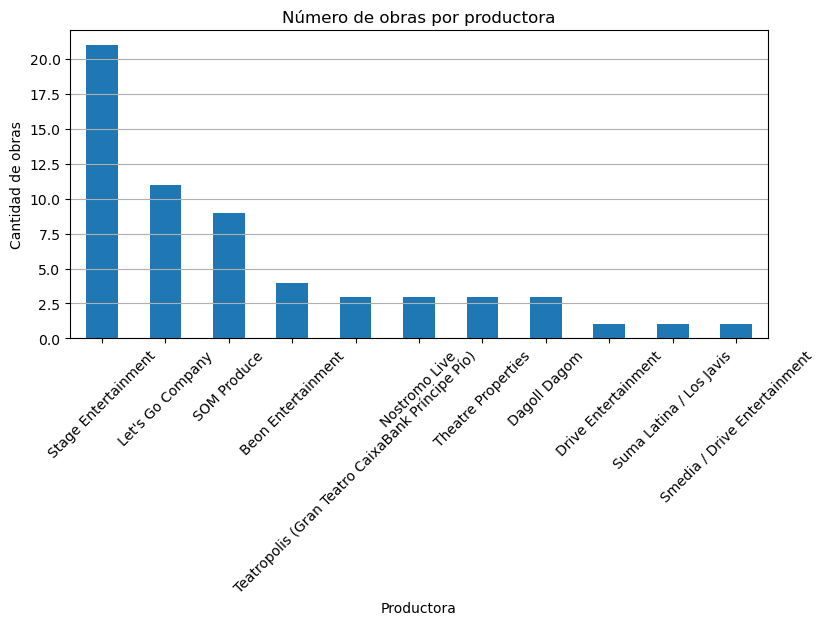

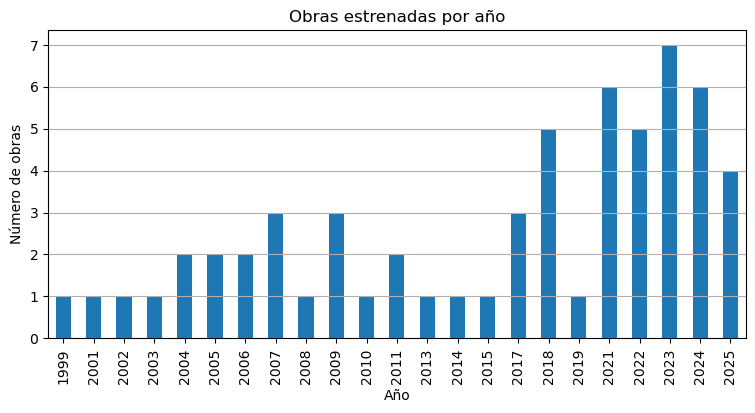

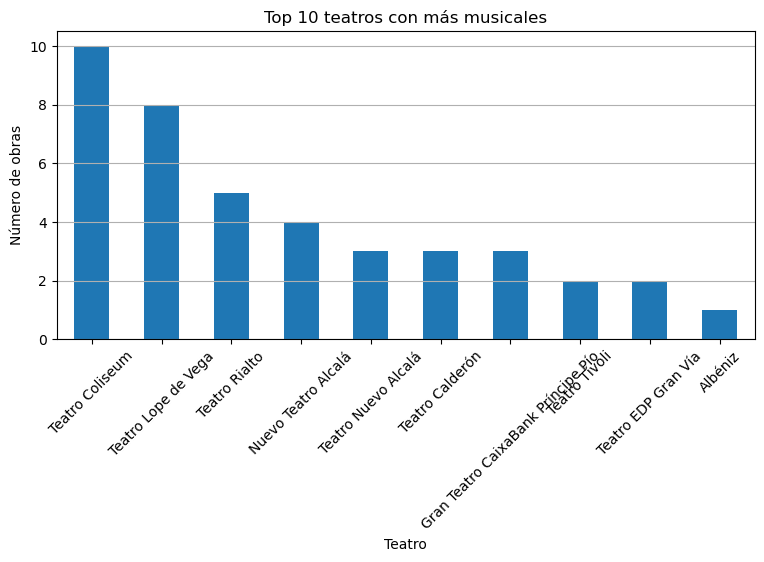

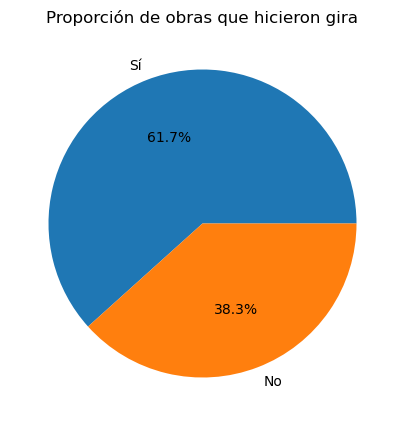

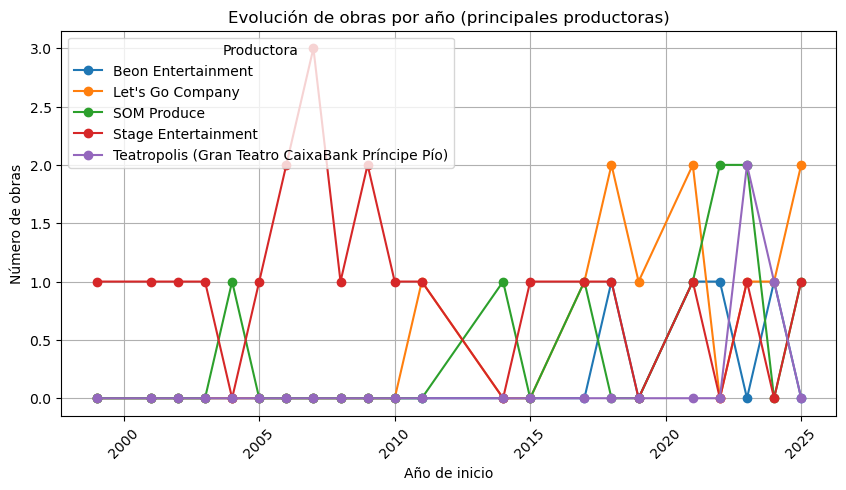

In [7]:
# 1. RE-CHEQUEO POST-LIMPIEZA
# =====================================================

print("=== NULOS POR COLUMNA ===")
display(df.isnull().sum())

print("\n=== FILAS DUPLICADAS POR CLAVE (obra, productora, anio_inicio) ===")
dup_clave = df.duplicated(subset=["obra", "productora", "anio_inicio"]).sum()
print(f"Número de filas duplicadas: {dup_clave}")

print("\n=== VALORES ÚNICOS POR COLUMNA ===")
display(df.nunique())

# =====================================================
# 2. NORMALIZACIÓN LIGERA DE CAMPOS DE TEXTO
# Strip general de espacios en columnas clave
for col in ["obra", "productora", "teatro", "ciudad_principal", "gira"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# Normalizar 'gira' a 'Sí' / 'No'
if "gira" in df.columns:
    mapa_gira = {
        "Si": "Sí",
        "SI": "Sí",
        "sí": "Sí",
        "sI": "Sí",
        "No": "No",
        "NO": "No",
        "no": "No"
    }
    df["gira"] = df["gira"].replace(mapa_gira)

# 2. Limpieza mínima por seguridad (por si quedan espacios)
# ============================================================
columnas_texto = ["obra", "productora", "teatro", "ciudad_principal", "gira"]
for col in columnas_texto:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()


# ============================================================
# 3. VISUALIZACIONES BÁSICAS DEL EDA
# ============================================================

# ------------------------ A) OBRAS POR PRODUCTORA ------------------------
plt.figure(figsize=(9,4))
df["productora"].value_counts().plot(kind="bar")
plt.title("Número de obras por productora")
plt.xlabel("Productora")
plt.ylabel("Cantidad de obras")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# ------------------------ B) OBRAS POR AÑO DE INICIO ------------------------
if "anio_inicio" in df.columns:
    plt.figure(figsize=(9,4))
    df["anio_inicio"].value_counts().sort_index().plot(kind="bar")
    plt.title("Obras estrenadas por año")
    plt.xlabel("Año")
    plt.ylabel("Número de obras")
    plt.grid(axis="y")
    plt.show()

# ------------------------ C) TOP TEATROS (10 MÁS ACTIVOS) ------------------------
plt.figure(figsize=(9,4))
df["teatro"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 teatros con más musicales")
plt.xlabel("Teatro")
plt.ylabel("Número de obras")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# ------------------------ D) PROPORCIÓN DE GIRAS ------------------------
plt.figure(figsize=(5,5))
df["gira"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Proporción de obras que hicieron gira")
plt.ylabel("")
plt.show()

import matplotlib.pyplot as plt

# Top 5 productoras por número total de obras
top_prod = df['productora'].value_counts().head(5).index
df_top = df[df['productora'].isin(top_prod)]

# Tabla año x productora
tabla = (
    df_top
    .groupby(['anio_inicio', 'productora'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

plt.figure(figsize=(10,5))
for prod in tabla.columns:
    plt.plot(tabla.index, tabla[prod], marker='o', label=prod)

plt.title('Evolución de obras por año (principales productoras)')
plt.xlabel('Año de inicio')
plt.ylabel('Número de obras')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Productora')
plt.show()


In [8]:
df.describe()

,anio_inicio,anio_fin
count,60.0000,47.000000
mean,2016.1000,2016.595745
std,7.7846,7.814868
min,1999.0000,2002.000000
25%,2009.0000,2009.000000
50%,2018.0000,2020.000000
75%,2023.0000,2023.500000
max,2025.0000,2025.000000


In [9]:


df.to_csv("musicales_limpio.csv", index=False, encoding="utf-8")
print("\nArchivo 'musicales_limpio.csv' guardado correctamente.")



Archivo 'musicales_limpio.csv' guardado correctamente.


Conclusiones finales 
El dataset queda limpio: sin duplicados y con nulos únicamente en anio_fin,asociados a producciones sin fecha de cierre confirmada.
Stage Entertainment es la productora con mayor número de titulos acumulados en el período analizado.
Los estrenos muestran tendencia creciente en los últimos años,con varios picos visibles en la serie temporal.
El teatro coliseum y el Lope de Vega concentran el mayor volumen de musicales en el conjunto del dataset.
La mayoría de las obras ha realizado gira, evidenciando que la gira es un modelo relevante de explotación dentro del período cubierto.